# Virtueller Taupunkt Sensor

In [1]:
# The code was removed by Watson Studio for sharing.

,DateTime [UTC],T,Td,ff,dd,P,Pstat,rF,rSD,RR
0,2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,NaN,97.0,0.0,0.0
1,2017-01-01 00:00:00,-5.1,-5.5,0.56,NaN,1031.7,NaN,97.0,0.0,0.0
2,2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,NaN,97.0,0.0,0.0
3,2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,NaN,96.0,0.0,0.0
4,2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,NaN,96.0,0.0,0.0


In [2]:
weather.tail()

,DateTime [UTC],T,Td,ff,dd,P,Pstat,rF,rSD,RR
16283,2018-11-10 10:00:00,10.0,6.9,3.611111,90.0,1013.7,NaN,81.0,0.0,0.0
16284,2018-11-10 11:00:00,10.3,7.0,3.611111,90.0,1013.1,NaN,80.0,0.0,0.0
16285,2018-11-10 12:00:00,10.5,7.3,3.055556,90.0,1012.8,NaN,80.0,0.0,0.0
16286,2018-11-10 13:00:00,10.6,7.2,2.500000,90.0,1012.4,NaN,79.0,0.0,0.0
16287,2018-11-10 14:00:00,10.1,7.1,4.166667,90.0,1012.2,NaN,82.0,0.0,0.0


In [3]:
type(weather)

pandas.core.frame.DataFrame

In [5]:
weather = weather.set_index('DateTime [UTC]')

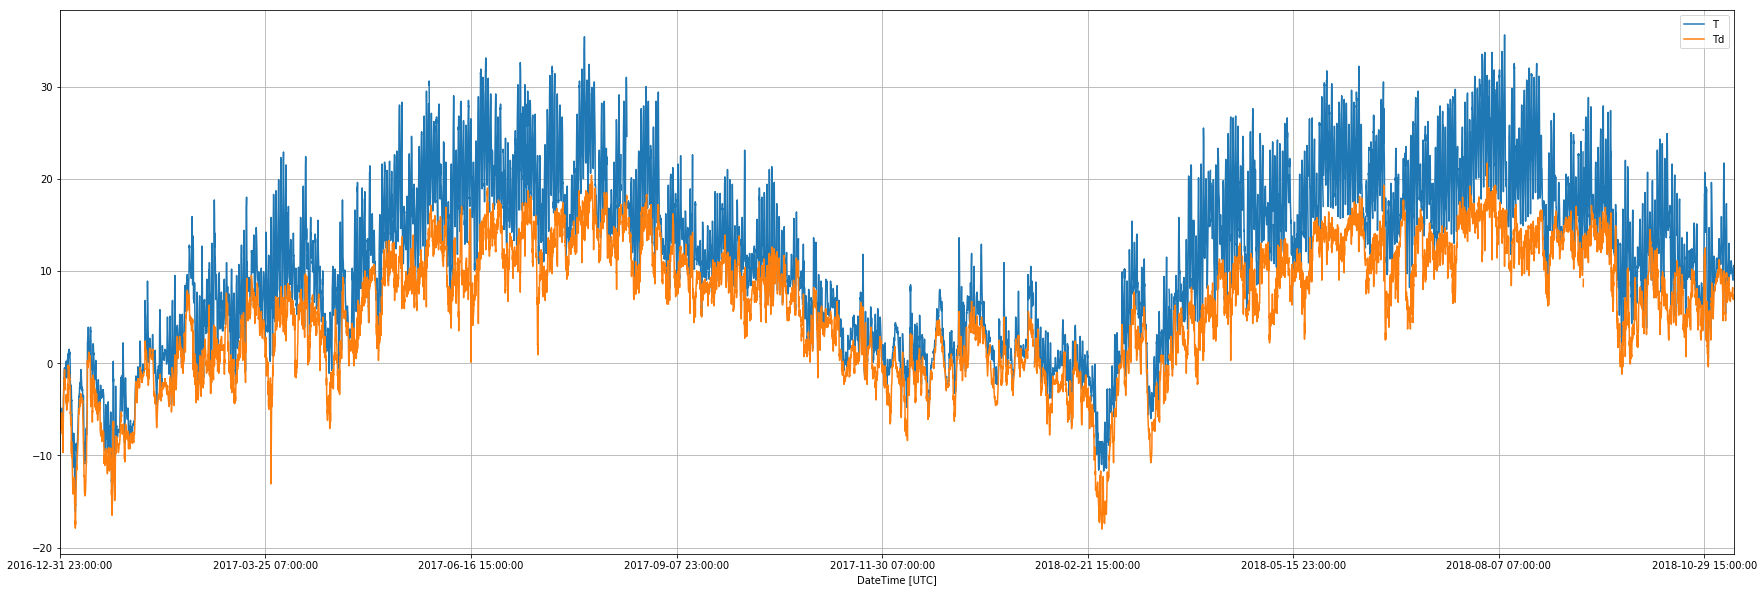

In [6]:
weather[['T', 'Td']].plot(grid=True, figsize=(30,10));

In [7]:
weather.shape

(16288, 9)

In [8]:
weather.describe()

,T,Td,ff,dd,P,Pstat,rF,rSD,RR
count,16151.000000,16151.000000,16151.000000,15185.000000,16151.000000,0.0,16151.00000,16004.000000,15722.000000
mean,11.334196,6.098161,3.259360,202.208100,1017.296619,NaN,73.42598,24.572929,0.073642
std,9.196078,7.059229,2.261420,93.536968,7.775018,NaN,17.78894,39.645128,0.481459
min,-16.100000,-18.000000,0.000000,0.000000,986.800000,NaN,16.00000,0.000000,0.000000
25%,4.100000,0.800000,1.388889,90.000000,1012.800000,NaN,61.00000,0.000000,0.000000
50%,11.700000,7.000000,2.500000,225.000000,1017.200000,NaN,78.00000,0.000000,0.000000
75%,18.100000,11.800000,4.722222,270.000000,1022.000000,NaN,88.00000,45.000000,0.000000
max,35.600000,21.700000,23.333333,360.000000,1042.000000,NaN,100.00000,100.000000,19.200000


In [14]:
train_data = weather.drop(columns='Pstat').dropna()
train_data.head()

,T,Td,ff,dd,P,rF,rSD,RR
DateTime [UTC],,,,,,,,
2016-12-31 23:00:00,-5.1,-5.5,1.11,135.0,1032.6,97.0,0.0,0.0
2017-01-01 01:00:00,-5.2,-5.7,1.11,315.0,1031.1,97.0,0.0,0.0
2017-01-01 02:00:00,-5.6,-6.1,1.11,315.0,1030.5,96.0,0.0,0.0
2017-01-01 03:00:00,-5.8,-6.3,1.11,270.0,1029.8,96.0,0.0,0.0
2017-01-01 05:00:00,-6.3,-6.8,1.11,270.0,1028.9,96.0,0.0,0.0


In [15]:
train_data.shape

(14789, 8)

## Train a linear regression model using scikits learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression() 

In [18]:
X = train_data[['T', 'rF', 'P']]
Y = train_data['Td']

In [20]:
X.head()

,T,rF,P
DateTime [UTC],,,
2016-12-31 23:00:00,-5.1,97.0,1032.6
2017-01-01 01:00:00,-5.2,97.0,1031.1
2017-01-01 02:00:00,-5.6,96.0,1030.5
2017-01-01 03:00:00,-5.8,96.0,1029.8
2017-01-01 05:00:00,-6.3,96.0,1028.9


In [21]:
Y.head()

DateTime [UTC]
2016-12-31 23:00:00   -5.5
2017-01-01 01:00:00   -5.7
2017-01-01 02:00:00   -6.1
2017-01-01 03:00:00   -6.3
2017-01-01 05:00:00   -6.8
Name: Td, dtype: float64

In [22]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lr.coef_, lr.intercept_

(array([0.95267614, 0.2338594 , 0.00237828]), -24.281223677043272)

In [25]:
y_pred = lr.predict(X)
y_pred

array([-3.99970001, -4.09853504, -4.71489187, ...,  6.83934806,
        6.69980496,  6.92456944])

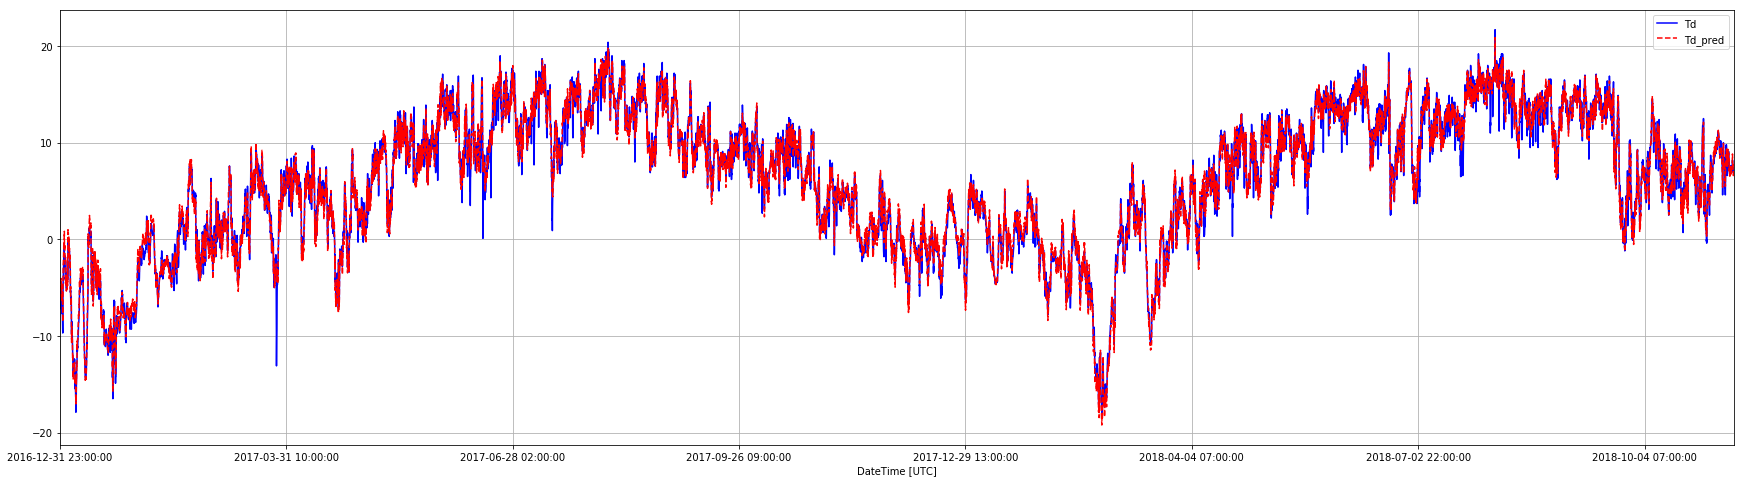

In [49]:
train_data['Td_pred'] = y_pred
train_data[['Td', 'Td_pred']].plot(style=['b-','r--'], figsize=(30,8), grid=True);

Text(0.5, 0, 'Td - TRUE')

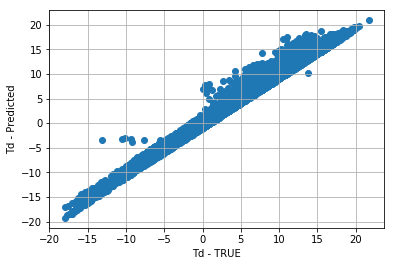

In [29]:
from matplotlib import pylab as plt
plt.scatter(Y.values, y_pred);
plt.grid(True)
plt.ylabel('Td - Predicted')
plt.xlabel('Td - TRUE')

## Try to evaluate future behaviour

### Split into train and test

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

In [34]:
len(X_train), len(X_test)

(8873, 5916)

In [35]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Text(0.5, 0, 'Td - TRUE')

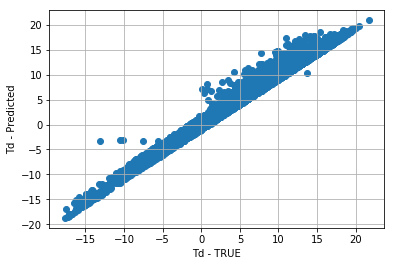

In [37]:
plt.scatter(Y_train.values, y_pred_train);
plt.grid(True)
plt.ylabel('Td - Predicted')
plt.xlabel('Td - TRUE')

Text(0.5, 0, 'Td - TRUE')

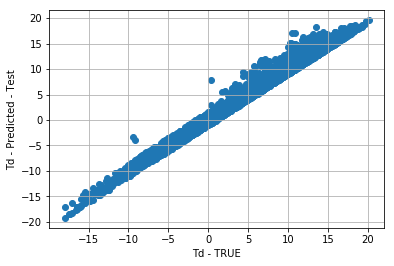

In [38]:
plt.scatter(Y_test.values, y_pred_test);
plt.grid(True)
plt.ylabel('Td - Predicted - Test')
plt.xlabel('Td - TRUE')

In [39]:
from sklearn.metrics.regression import mean_absolute_error, mean_squared_error, r2_score

In [40]:
mean_absolute_error(Y_test, y_pred_test)

0.6151334737475427

In [41]:
mean_squared_error(Y_test, y_pred_test)

0.6787256240495384

In [42]:
r2_score(Y_test, y_pred_test)

0.9863784866132957

In [44]:
from sklearn.model_selection import cross_val_predict

In [45]:
y_pred_cv = cross_val_predict(lr, X, Y, cv=3)

In [47]:
r2_score (Y, y_pred_cv)

0.9841372744120441

In [48]:
mean_absolute_error(Y, y_pred_cv)

0.6508762315370575